In [1]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [2]:
# Cargar los datos
data = pd.read_csv("data_evaluacion.csv", header=None)

etiquetas = ['edad', 'tipo_empleado', 'fnlwgt', 'educacion', 'educacion_num', 
                 'estado_civil', 'ocupacion', 'relacion', 'raza', 'sexo', 
                 'capital_ganado', 'capital_perdido', 'hr_por_semana', 'pais', 'ganancia']
data.columns = etiquetas

In [3]:
# Reemplazar las categorías en el DataFrame con valores numéricos
def categorize_employment(job_category):
    if job_category in ['State-gov', 'Federal-gov', 'Local-gov']:
        return 1
    elif job_category == 'Private':
        return 2
    elif job_category in ['Self-emp-not-inc', 'Self-emp-inc']:
        return 3
    elif job_category == 'Without-pay':
        return 4
    elif job_category == 'Never-worked':
        return 5
    else:
        return np.nan

data['tipo_empleado'] = data['tipo_empleado'].apply(categorize_employment).astype('Int32')

In [4]:
def categorize_sex(sex_category):
    if sex_category == 'Male':
        return 1
    elif sex_category == 'Female':
        return 2
    else:
        return pd.NA

data['sexo'] = data['sexo'].apply(categorize_sex).astype('Int32')

In [5]:
def categorize_continent(country_category):
    if country_category in ['United-States', 'Canada', 'Mexico', 'Puerto-Rico', 'Outlying-US(Guam-USVI-etc)']:
        return 1
    elif country_category in ['Cuba', 'Jamaica', 'Honduras', 'Columbia', 'Ecuador', 'Haiti', 
                              'Dominican-Republic', 'El-Salvador', 'Guatemala', 'Peru', 
                              'Nicaragua', 'Trinadad&Tobago']:
        return 2
    elif country_category in ['England', 'Germany', 'Italy', 'Poland', 'Portugal', 'France', 
                              'Scotland', 'Ireland', 'Hungary', 'Greece', 'Netherlands', 
                              'Yugoslavia']:
        return 3
    elif country_category in ['India', 'Iran', 'Philippines', 'Cambodia', 'Thailand', 'Laos', 
                              'Taiwan', 'China', 'Japan', 'Vietnam', 'Hong']:
        return 4
    elif country_category in ['South', 'Nigeria']:
        return 5
    else:
        return pd.NA

data['pais'] = data['pais'].apply(categorize_continent).astype('Int32')

In [6]:
def categorize_relationship(relationship_category):
    if relationship_category == 'Not-in-family':
        return 1
    elif relationship_category == 'Husband':
        return 2
    elif relationship_category == 'Wife':
        return 3
    elif relationship_category == 'Own-child':
        return 4
    elif relationship_category == 'Unmarried':
        return 5
    elif relationship_category == 'Other-relative':
        return 6
    else:
        return pd.NA

data['relacion'] = data['relacion'].apply(categorize_relationship).astype('Int32')

In [7]:
def categorize_civil_status(civil_status_category):
    if civil_status_category in ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']:
        return 1
    elif civil_status_category in ['Never-married', 'Separated']:
        return 2
    elif civil_status_category == 'Divorced':
        return 3
    elif civil_status_category == 'Widowed':
        return 4
    else:
        return pd.NA

data['estado_civil'] = data['estado_civil'].apply(categorize_civil_status).astype('Int32')

In [8]:
def categorize_race(race_category):
    if race_category == 'White':
        return 1
    elif race_category == 'Black':
        return 2
    elif race_category == 'Asian-Pac-Islander':
        return 3
    elif race_category == 'Amer-Indian-Eskimo':
        return 4
    elif race_category == 'Other':
        return 5
    else:
        return pd.NA

data['raza'] = data['raza'].apply(categorize_race).astype('Int32')

In [9]:
def categorize_education(education_category):
    if education_category in ['Preschool', '1st-4th', '5th-6th', '7th-8th']:
        return 1
    elif education_category in ['HS-grad', '9th', '10th', '11th', '12th']:
        return 2
    elif education_category in ['Some-college', 'Assoc-acdm', 'Assoc-voc', 'Bachelors']:
        return 3
    elif education_category in ['Prof-school', 'Masters', 'Doctorate']:
        return 4
    else:
        return pd.NA

data['educacion'] = data['educacion'].apply(categorize_education).astype('Int32')

In [10]:
def categorize_income(income_category):
    if income_category == '<=50K':
        return 1
    elif income_category == '>50K':
        return 2
    else:
        return pd.NA

data['ganancia'] = data['ganancia'].apply(categorize_income).astype('Int32')

In [11]:
def categorize_occupation(occupation_category):
    if occupation_category in ['Adm-clerical', 'Exec-managerial']:
        return 1
    elif occupation_category in ['Handlers-cleaners', 'Other-service', 'Sales', 'Tech-support', 'Priv-house-serv']:
        return 2
    elif occupation_category in ['Prof-specialty', 'Protective-serv']:
        return 3
    elif occupation_category in ['Craft-repair', 'Transport-moving', 'Farming-fishing', 'Machine-op-inspct']:
        return 4
    elif occupation_category == 'Armed-Forces':
        return 5
    else:
        return pd.NA

data['ocupacion'] = data['ocupacion'].apply(categorize_occupation).astype('Int32')

In [12]:
# Rellenar valores NaN
data['tipo_empleado'].fillna(data['tipo_empleado'].mode()[0], inplace=True)
data['ocupacion'].fillna(data['ocupacion'].mode()[0], inplace=True)
data['pais'].fillna(data['pais'].mode()[0], inplace=True)

X = data.drop(['ganancia'], axis=1)
y = data['ganancia']

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Ajustar el scaler a los datos de entrenamiento y transformarlos
X_scaled = scaler.fit_transform(X)

# Convertir el array escalado de vuelta a un DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_19236\3438277387.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['tipo_empleado'].fillna(data['tipo_empleado'].mode()[0], inplace=True)
C:\Users\Sebastian\AppData\Local\Temp\ipykernel_19236\3438277387.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [13]:
# Función para entrenar y evaluar KNN con diferentes valores de k
def evaluar_knn(k):
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    print(f'Resultados para k: {k}')
    print('Train Accuracy : %.5f' % modelo.score(X_train, y_train))
    print('Test Accuracy : %.5f' % modelo.score(X_test, y_test))
    print("Precisión del modelo:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
    disp.plot()
    plt.title(f'Matriz de confusión para k: {k}')
    plt.show()

El mejor valor para k es: 16 con una precisión de: 0.8341636524943697
Resultados para k: 16
Train Accuracy : 0.85653
Test Accuracy : 0.83416
Precisión del modelo: 0.8341636524943697
              precision    recall  f1-score   support

         1.0       0.86      0.93      0.90     11109
         2.0       0.72      0.52      0.60      3544

    accuracy                           0.83     14653
   macro avg       0.79      0.73      0.75     14653
weighted avg       0.82      0.83      0.82     14653



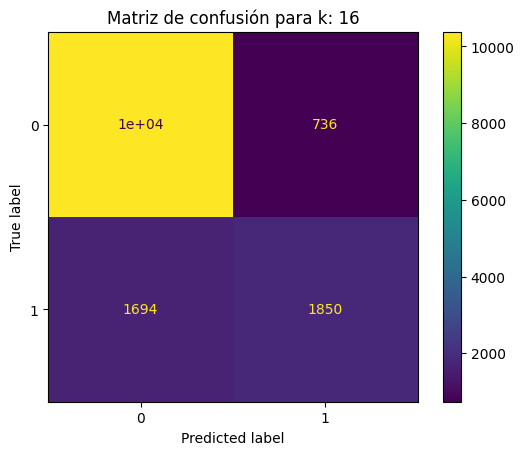

In [14]:
# Buscar el mejor k
mejor_k = 1
mejor_precision = 0
valores_k = range(1, 21)  # Probar valores de k de 1 a 20

for k in valores_k:
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    precision = accuracy_score(y_test, y_pred)
    
    if precision > mejor_precision:
        mejor_precision = precision
        mejor_k = k

print(f'El mejor valor para k es: {mejor_k} con una precisión de: {mejor_precision}')

# Evaluar KNN con el mejor valor de k
evaluar_knn(mejor_k)